# PRÁCTICA FINAL APRENDIZAJE AUTOMÁTICO

## Cristina Ballesteros Samas y Lucía Hernáez Magán

### 0. Introducción y motivación

Hemos escogido la base de datos recomendada "airbnb-listings-extract.csv". Dado nuestro conocimiento a nivel usuario sobre airbnb nos ha parecido particularmente interesante realizar este trabajo. 

Nuestro objetivo final es evaluar como de bueno es el precio de un determinado apartamento según sus características. Para ello trataremos de implementar un algoritmo (trataremos de hacerlo tanto con una red neuronal como con otros métodos de clasificación como la regresión logística) que nos permita clasificar los apartamentos en:
- Precio justo: En los casos en los que el precio sea acorde a las características del apartamento.
- Super Precio: En los casos en los que el apartamento tenga un precio inferior al esperado dadas las características de este.
- Timo: Cuando el precio sea demasiado alto para las características del apartamento.


Dado que en nuestra base de datos no existe ninguna variable categórica de acuerdo a la cual poder clasificar la crearemos haciendo uso de varios procedimientos que se detallaran a continuación.

Además, llevaremos a cabo un proceso de predicción de los precios de los apartamentos utilizando tanto la regresión lineal como una red neuronal. Evaluaremos los procedimientos y como de bueno es el entrenamiento para cada uno de los modelos.

### 0. Selección y carga de la base de datos

Cargamos las librerías más comunes que vamos a utilizar, posteriormente cargaremos más en caso de que sean necesarias, y también cargamos la base de datos.

In [2]:
import numpy  as np  
import pandas as pd

In [3]:
df=pd.read_csv("airbnb-listings-extract.csv", sep =";")

In [4]:
df.head().T

,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

Observamos que nuestros datos están formados por 14780 observaciones y por 89 variables distintas de tipos int, object y float. Por tanto, dada la gran cantidad de variables, nuestro primer objetivo será quedarnos únicamente con aquellas que sean significantes para nuestro análisis. La primera observación que hacemos es que existen algunas variables que tienen muchos datos nulos. Eliminamos las variables: 'Jurisdiction Names','License','Has Availability','Square Feet'y 'Host Acceptance Rate'.

In [6]:
df=df.drop([ 'Jurisdiction Names','License','Has Availability','Square Feet','Host Acceptance Rate'],axis=1)

A simple vista creemos que algunas de las variables no son relevantes en nuestro estudio así que las eliminamos, reduciendo bastante el número de varaibles explicarivas.

In [7]:
df = df.drop(['Listing Url', 'ID' ,'Scrape ID', 'Last Scraped', 'Name', 'Summary',
              'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
              'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
              'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
              'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
              'Host About', 'Host Response Time', 'Host Response Rate',
              'Host Thumbnail Url', 'Host Picture Url',
              'Host Neighbourhood', 'Host Listings Count',
              'Host Total Listings Count', 'Host Verifications','Neighbourhood Cleansed',
              'Neighbourhood Group Cleansed','Geolocation', 'Calendar last Scraped' ], axis=1)

In [8]:
df.head().T

,0,1,2,3,4
Street,"Canyon Edge Drive, Austin, TX 78733, United St...","Barcelona, Barcelona 08010, Spain","Barcelona, Barcelona 08008, Spain","Barcelona, Barcelona 08009, Spain","L'Antiga Esquerra de l'Eixample, Barcelona, Ca..."
Neighbourhood,NaN,NaN,NaN,NaN,L'Antiga Esquerra de l'Eixample
City,Austin,Barcelona,Barcelona,Barcelona,Barcelona
State,TX,Barcelona,Barcelona,Barcelona,Catalunya
Zipcode,78733,08010,08008,08009,08036
Market,Austin,Barcelona,Barcelona,Barcelona,Barcelona
Smart Location,"Austin, TX","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain"
Country Code,US,ES,ES,ES,ES
Country,United States,Spain,Spain,Spain,Spain
Latitude,30.337361,41.389683,41.393035,41.396967,41.388685


Hecho esto se nos ocurren algunas ideas para el resto de variables:
   - Las variables que parecen ser más significativas para evaluar el precio son las siguientes: 'Property Type', 'Room Type', 'Accommodates', Bedrooms','Beds', 'Bathrooms', 'Neighbourhood', 'Amenities', 'Review Scores Rating' y 'Availability 365'.
   - Combinar las variables de Review Scores y number of reviews para crear una nueva variable llamada valoración media.
   - Estudiar todas las variables relativas al precio para calcular un precio único por día y por persona (sumando el precio de limpieza e incluyendo la posibilidad de que la fianza no sea devuelta).
   - Tranformar y combinar algunas variables para facilitar el análisis, por ejemplo podemos sustituir las variables máximo y mínimo número de noches por otra variable llamada restricciones que valga 1 si existen restricciones y cero en caso contrario.

Esto solo son unas primeras aproximaciones e hipótesis que comprobaremos posteriormente con los métodos correspondientes.

### 1. Preparación de la base de datos. Análisis Exploratorio.

### 1.1. Análisis Faltantes

Nuestro primer paso en el análisis exploratorio será estudiar la existencia de datos nulos y en su caso tratarlos.

In [9]:
df.isna().any()

Street                            False
Neighbourhood                      True
City                               True
State                              True
Zipcode                            True
Market                             True
Smart Location                    False
Country Code                      False
Country                            True
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                          True
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                          True
Price                              True
Weekly Price                       True
Monthly Price                      True
Security Deposit                   True
Cleaning Fee                       True
Guests Included                   False


Observamos que la gran mayoría de variables presentan datos nulos.
De entre las variables: 'Neighbourhood', 'City', 'State','Zipcode', 'Market'y'Smart Location', podemos eliminar todas salvo una pues nos aportan una información muy similar. Dado que la única que no presenta datos nulos es 'Smart Location' nos quedaremos con ella.

In [10]:
df = df.drop(['Neighbourhood', 'City', 'State','Zipcode', 'Market'], axis=1)

Además eliminamos la variable 'Country' por ser linealmente dependiente de 'Country Code' y presentra faltantes.

In [11]:
df = df.drop(['Country'], axis=1)

De entre el resto de variables que presentan datos nulos eliminamos además 'First Review' puesto que no nos parece relevante cuando se hizo la primera review, sí lo es cuando se hizo la última. También eliminamos 'Reviews per Month'.

In [12]:
df = df.drop([ 'First Review', 'Reviews per Month'], axis=1)

In [13]:
df.isna().any()

Street                            False
Smart Location                    False
Country Code                      False
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                          True
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                          True
Price                              True
Weekly Price                       True
Monthly Price                      True
Security Deposit                   True
Cleaning Fee                       True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar Updated                  False
Availability 30                   False
Availability 60                   False


Observamos que la lista de variables que presentan datos nulos se ha reducido, sin embargo; aún hay una gran cantidad de variables con missings. Para acabar con este problema usaremos la clase Imputer de sklearn y susutituiremos los datos nulos por la mediana. Este procedimiento solo sirve para las variables que no son objects, estás últimas las trataremos individualmente.

Antes de proceder con el algoritmo debemos tener en cuenta algunas caracteristicas que hasta ahora habiamos pasado por alto debido a que consideramos interesante incluirlas en el análisis de precios :
- Las variables Weekly Price y Monthly Price presentaban aproximadamente un 25% de datos no nulos, una cifra muy baja que al imputar los faltantes posiblemente genere una distorsión en los resultados.
- Las variable Security Deposit presenta menos del 50% de los datos no nulos, por lo que imputar faltantes también va a perjudicar a las predicciones.
     
Por ello eliminamos de nuestro análisis estas tres variables.

In [14]:
df=df.drop(['Weekly Price','Monthly Price','Security Deposit'],axis=1)

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [16]:
df_num = df.select_dtypes(exclude=['object'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        14780 non-null  float64
 1   Longitude                       14780 non-null  float64
 2   Accommodates                    14780 non-null  int64  
 3   Bathrooms                       14725 non-null  float64
 4   Bedrooms                        14755 non-null  float64
 5   Beds                            14731 non-null  float64
 6   Price                           14763 non-null  float64
 7   Cleaning Fee                    8687 non-null   float64
 8   Guests Included                 14780 non-null  int64  
 9   Extra People                    14780 non-null  int64  
 10  Minimum Nights                  14780 non-null  int64  
 11  Maximum Nights                  14780 non-null  int64  
 12  Availability 30                 

In [17]:
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [18]:
df_num_nonan = imputer.transform(df_num)

In [19]:
df_ = pd.DataFrame(df_num_nonan, columns=df_num.columns)

In [20]:
df[df_num.columns]=df_
df.isna().any()

Street                            False
Smart Location                    False
Country Code                      False
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Amenities                          True
Price                             False
Cleaning Fee                      False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar Updated                  False
Availability 30                   False
Availability 60                   False
Availability 90                   False
Availability 365                  False
Number of Reviews                 False


Observamos que hemos conseguido eliminar los datos missing de las variables numéricas pero aún quedan los de las variables categóricas. Vamos a tratar de eliminarlos también.

In [21]:
df_cat_na=df[['Amenities', 'Last Review','Features']]
df_cat_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Amenities    14610 non-null  object
 1   Last Review  11617 non-null  object
 2   Features     14779 non-null  object
dtypes: object(3)
memory usage: 346.5+ KB


Observamos que la variable 'Last Review' presenta bastantes menos datos missing que las variables anteriormente eliminadas pero un gran número aún así. Por ello también la eliminamos. Por último para acabar definitivamente con los missings eliminamos las filas correspondientes a los datos nulos.

In [22]:
df=df.drop(['Last Review'], axis=1)

In [23]:
df=df.dropna()

In [24]:
df.isna().any()

Street                            False
Smart Location                    False
Country Code                      False
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Amenities                         False
Price                             False
Cleaning Fee                      False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar Updated                  False
Availability 30                   False
Availability 60                   False
Availability 90                   False
Availability 365                  False
Number of Reviews                 False


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14609 entries, 0 to 14779
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Street                          14609 non-null  object 
 1   Smart Location                  14609 non-null  object 
 2   Country Code                    14609 non-null  object 
 3   Latitude                        14609 non-null  float64
 4   Longitude                       14609 non-null  float64
 5   Property Type                   14609 non-null  object 
 6   Room Type                       14609 non-null  object 
 7   Accommodates                    14609 non-null  float64
 8   Bathrooms                       14609 non-null  float64
 9   Bedrooms                        14609 non-null  float64
 10  Beds                            14609 non-null  float64
 11  Bed Type                        14609 non-null  object 
 12  Amenities                       

Finalmente hemos conseguido eliminar todo los datos missing y nos hemos quedado con 14609 observaciones y 37 variables.

### 1.2. Análisis Duplicados

Prosiguiendo con nuestro análisis exploratorio estudiamos la existencia de datos duplicados y los eliminamos en caso de que sea necesario.

In [26]:
df.duplicated().sum()

0

Observamos que no existen datos duplicados, por tanto no tenemos que eliminarlos.

### 1.3. Tranformación de variables.

Hasta ahora hemos reducido la dimensionalidad de nuestro problema únicamente mediante metodos de seleccion filter de variables, es decir; únicamente hemos utilizado la información dada por las variables para seleccionar las que hemos considerado más adecuadas. En este apartado trataremos de seguir reduciendo la dimensionalidad pero ahora mediante la trasformación de algunas variables.

En primera instancia realizamos un análisis gráfico para tratar de determinar de una manera más eficiente las transformaciones realizadas.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14609 entries, 0 to 14779
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Street                          14609 non-null  object 
 1   Smart Location                  14609 non-null  object 
 2   Country Code                    14609 non-null  object 
 3   Latitude                        14609 non-null  float64
 4   Longitude                       14609 non-null  float64
 5   Property Type                   14609 non-null  object 
 6   Room Type                       14609 non-null  object 
 7   Accommodates                    14609 non-null  float64
 8   Bathrooms                       14609 non-null  float64
 9   Bedrooms                        14609 non-null  float64
 10  Beds                            14609 non-null  float64
 11  Bed Type                        14609 non-null  object 
 12  Amenities                       

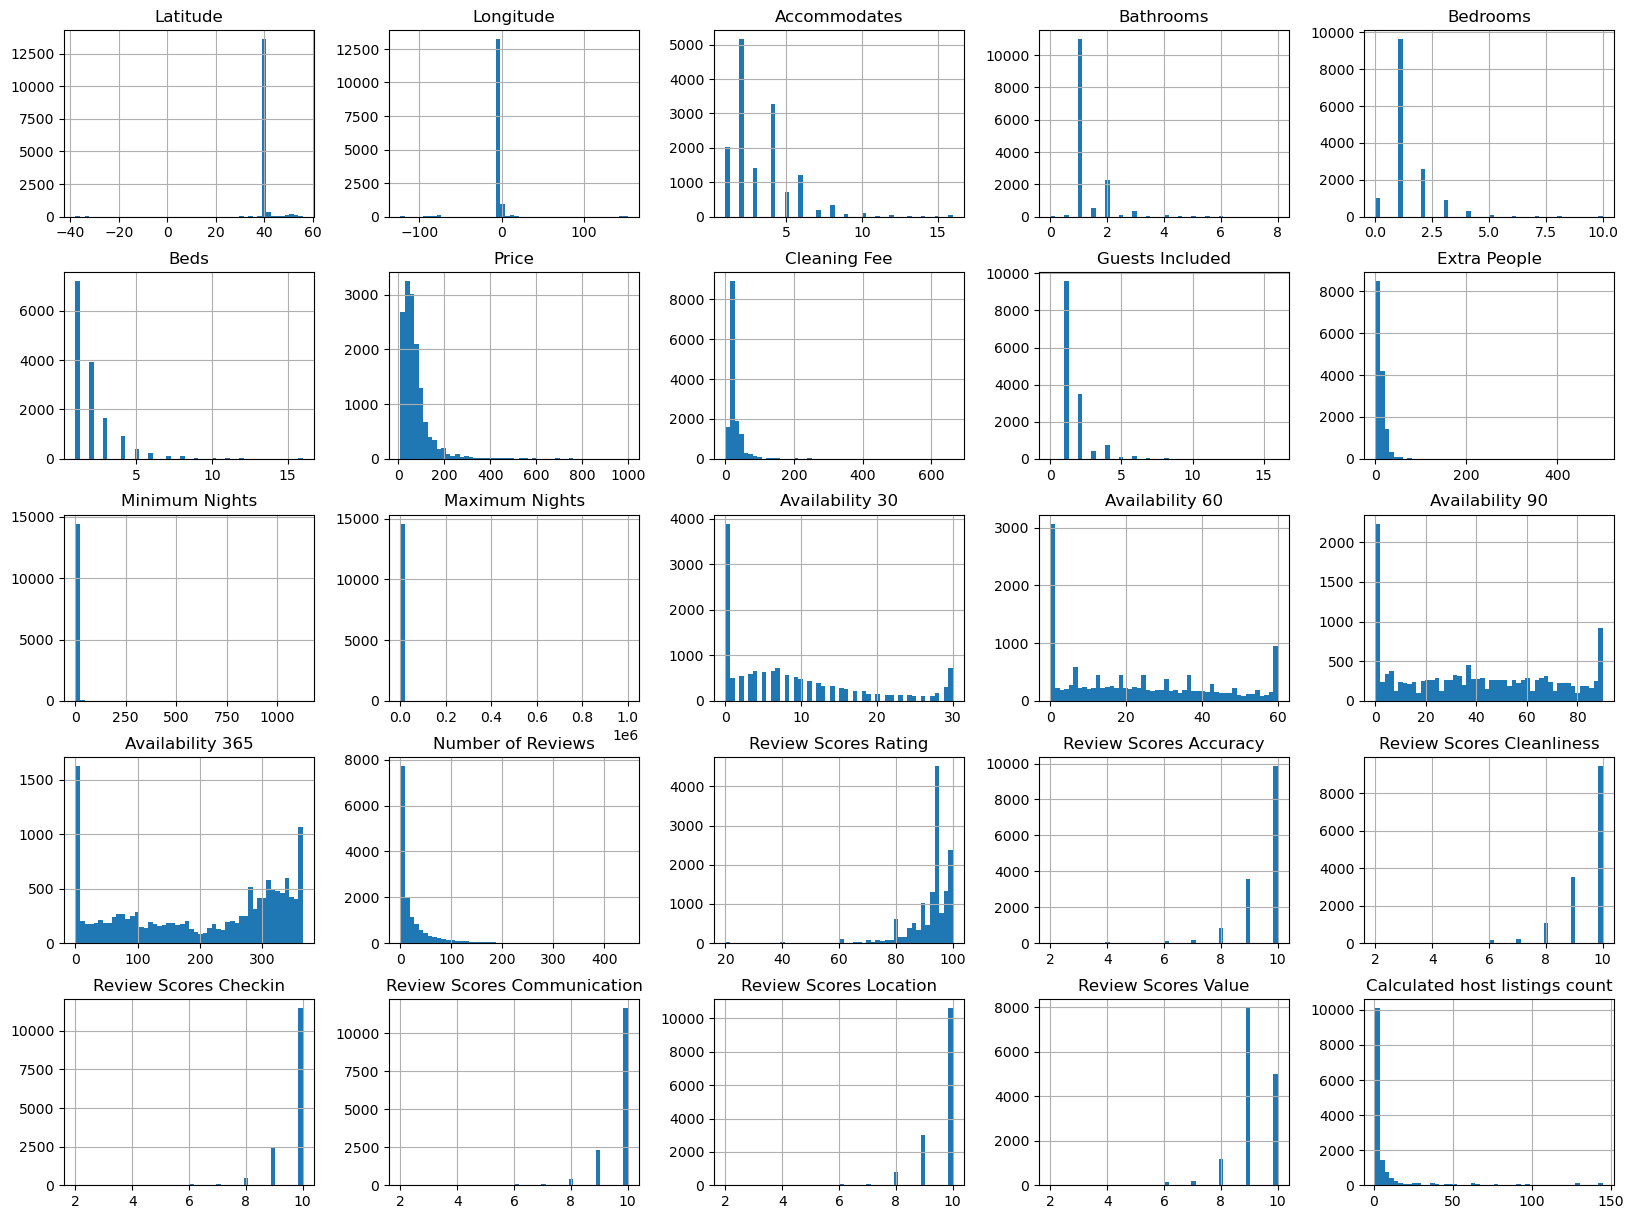

In [28]:
import matplotlib.pyplot as plt
# Representar gráficamente la distribución de los atributos
df.hist(bins=50, figsize=(20,15))
plt.show()

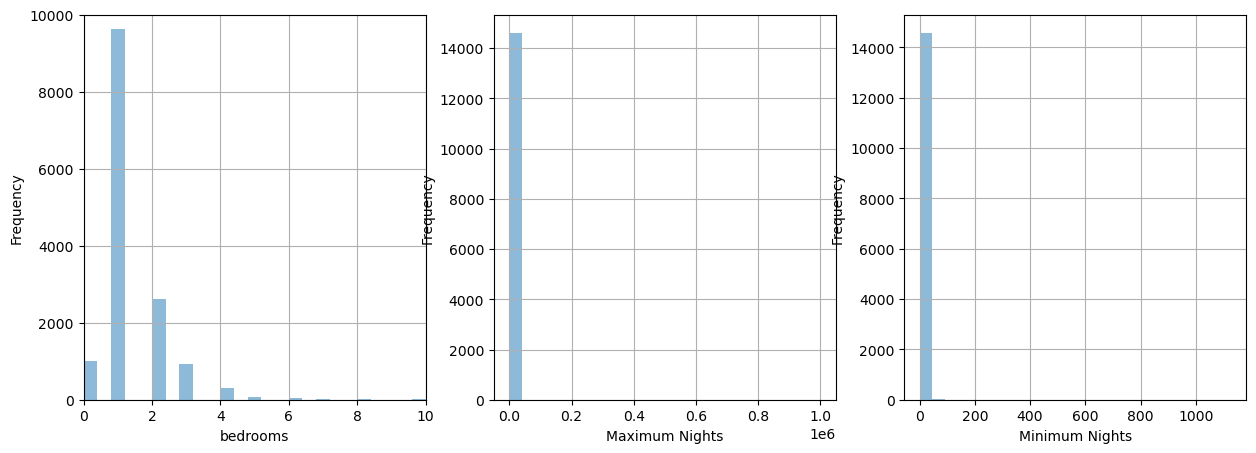

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 10, 0, 10000])
plt.xlabel('bedrooms')

plt.subplot(1,3,2)
df['Maximum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Maximum Nights')

plt.subplot(1,3,3)
df['Minimum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Minimum Nights')

plt.show()

A partir de los histogramas anteriores centramos nuestra atención en las variables maximum nights y minimum nights y bservamos que parecen tomar muchos valores en 1.  Esto se puede interpretar como que no hay una restricción específica en la cantidad máxima de noches que un huésped puede reservar esa propiedad. En otras palabras, un huésped podría reservar esa propiedad por cualquier cantidad de noches, desde una sola noche hasta el tiempo que desee. Parece buena idea crear una nueva variable que me indique con valor 1 si la vivienda posee alguna restricccion del número de noches a reservar o si no.

In [30]:
df['Maximum Nights'].value_counts().sort_index()

1.0           16
2.0           34
3.0          103
4.0           90
5.0          119
            ... 
11111.0        2
30000.0        1
99999.0        4
100000.0       1
1000000.0      1
Name: Maximum Nights, Length: 173, dtype: int64

In [31]:
# Crear la nueva variable que indica si hay restricción
df['restriction'] = (df['Maximum Nights'] > 1) & (df['Minimum Nights'] > 1)

# Convertir los valores booleanos en enteros
df['restriction'] = df['restriction'].astype(int)

#Eliminar las variables 'Maximun Nights' y 'Minimum Nights'
df=df.drop(['Maximum Nights', 'Minimum Nights'],axis=1)

In [32]:
df['restriction'].value_counts()

1    9727
0    4882
Name: restriction, dtype: int64

### 1.3.1. Transformación de variables categóricas.

Para poder llevar a cabo nuestra predicción tenemos además que transformar todas las variables catégoricas en numéricas. Realizaremos una tranformación individual para cada una de ellas que consideramos adecuada para el tratamiento de los datos.

*Tranformacion de las variables Amenities y Features*

Para las variables Amenities y Features podemos contar el número de elementos que tiene cada una de ellas, de esta manera si para una observación la variable Amenities tiene el valor "TV,Cable TV,Internet" le daremos en nuestra nueva variable el valor 3. De esta manera asumimos que cuantos más elementos tenga la variable mejor.


In [33]:
#Creamos una funcion que cuente los elementos
def count_elements(s):
    return len(s.split(','))
# Aplicar la función a cada fila del DataFrame
df['Amenities_cat'] = df['Amenities'].astype(str).apply(count_elements)
df['Features_cat'] = df['Features'].astype(str).apply(count_elements)
# Eliminar las columnas 'Amenities' y 'Features'
df=df.drop(['Amenities','Features'], axis=1)
# Imprimir el DataFrame con la nueva columna
df.T

,0,1,2,3,4,5,6,7,8,9,...,14770,14771,14772,14773,14774,14775,14776,14777,14778,14779
Street,"Canyon Edge Drive, Austin, TX 78733, United St...","Barcelona, Barcelona 08010, Spain","Barcelona, Barcelona 08008, Spain","Barcelona, Barcelona 08009, Spain","L'Antiga Esquerra de l'Eixample, Barcelona, Ca...","La Nova Esquerra de l'Eixample, Barcelona, Cat...","el Fort Pienc, Barcelona, Catalonia 08013, Spain","La Sagrada Família, Barcelona, Catalonia 08025...","El Camp de l'Arpa del Clot, Barcelona, Catalun...","Enfield Road, Austin, TX 78703, United States",...,"Sineu, Illes Balears 07510, Spain","Pina, Balearic Islands 07220, Spain","Petra, Balearic Islands 07520, Spain","Balearic Islands, Balearic Islands, Spain","Ditmars / Steinway, Queens, NY 11105, United S...","Bedford-Stuyvesant, Brooklyn, NY 11213, United...","Porte de Versailles, Paris, Île-de-France 7501...","Paris, Île-de-France, France","Gaylord Street, Denver, CO 80206, United States","35th Avenue Northeast, Seattle, WA 98105, Unit..."
Smart Location,"Austin, TX","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Austin, TX",...,"Sineu, Spain","Pina, Spain","Petra, Spain","Balearic Islands, Spain","Queens, NY","Brooklyn, NY","Paris, France","Paris, France","Denver, CO","Seattle, WA"
Country Code,US,ES,ES,ES,ES,ES,ES,ES,ES,US,...,ES,ES,ES,ES,US,US,FR,FR,US,US
Latitude,30.337361,41.389683,41.393035,41.396967,41.388685,41.382537,41.399058,41.402357,41.407356,30.287124,...,39.646497,39.595354,39.604911,39.740432,40.771787,40.678945,48.836197,48.888809,39.742205,47.672327
Longitude,-97.863277,2.172625,2.162173,2.167418,2.15515,2.149577,2.184229,2.171119,2.182982,-97.768164,...,2.992312,2.927612,3.097125,2.931212,-73.898799,-73.939342,2.294045,2.316173,-104.959933,-122.291451
Property Type,Loft,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,House,...,House,House,House,House,Apartment,Apartment,Bed & Breakfast,Apartment,Apartment,House
Room Type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Entire home/apt,...,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Private room
Accommodates,2.0,4.0,4.0,8.0,5.0,6.0,5.0,2.0,6.0,6.0,...,8.0,2.0,10.0,8.0,1.0,2.0,1.0,5.0,4.0,2.0
Bathrooms,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,...,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
Bedrooms,1.0,1.0,1.0,3.0,2.0,2.0,3.0,1.0,2.0,3.0,...,3.0,1.0,4.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0


*Eliminación variable Street*

Además la variable 'Street' parece que va a aportar mucha variabilidad, por tanto va a debilitar nuestras predicciones, por ello la eliminamos.

In [34]:
df=df.drop(['Street'],axis=1)

Estudiamos el resto de variables categóricas y las transformamos en caso de que sea necesario:

In [35]:
df.select_dtypes('object')

,Smart Location,Country Code,Property Type,Room Type,Bed Type,Calendar Updated,Cancellation Policy
0,"Austin, TX",US,Loft,Entire home/apt,Real Bed,today,moderate
1,"Barcelona, Spain",ES,Apartment,Entire home/apt,Real Bed,today,super_strict_30
2,"Barcelona, Spain",ES,Apartment,Entire home/apt,Real Bed,today,super_strict_30
3,"Barcelona, Spain",ES,Apartment,Entire home/apt,Real Bed,today,strict
4,"Barcelona, Spain",ES,Apartment,Entire home/apt,Real Bed,today,flexible
...,...,...,...,...,...,...,...
14775,"Brooklyn, NY",US,Apartment,Entire home/apt,Real Bed,5 days ago,strict
14776,"Paris, France",FR,Bed & Breakfast,Private room,Real Bed,3 days ago,flexible
14777,"Paris, France",FR,Apartment,Entire home/apt,Real Bed,5 days ago,strict
14778,"Denver, CO",US,Apartment,Entire home/apt,Real Bed,yesterday,moderate


Observamos que:
 - Podemos prescindir de la variable Smart Location y quedarnos con Country Code haciendo la correspondiente transformación en numérica.
 - Podemos eliminar las variablkes Room Type y Bed Type por estar la primera en cierta medida incluida en Property Type y por ser la segunda poco descriptiva.
 - Podemos transformar la variable Calendar Updated en una númerica que nos de el número de días desde la última actualización.
 - Necesitamos transformamos las variable Cancellation Policy y Property Type en númericas.

*Eliminacion de variables*

In [36]:
df=df.drop(['Smart Location','Room Type','Bed Type'],axis=1)

*Tranformación variable Calendar Updated*

In [37]:
def transform1(string):
    time_mapping = {
        "today": 0,
        "yesterday": 1,
        "2 days ago": 2,
        "3 days ago": 3,
        "4 days ago": 4,
        "5 days ago": 5,
        "6 days ago": 6,
        "a week ago":7,
        "1 week ago": 7,
        "2 weeks ago": 14,
        "3 weeks ago": 21,
        "4 weeks ago": 28,
        "5 weeks ago": 35,
        "6 weeks ago": 42,
        "7 weeks ago": 49,
        "2 months ago": 60,
        "3 months ago": 90,
        "4 months ago": 120,
        "5 months ago": 150,
        "6 months ago": 180,
        "7 months ago": 210,
        "8 months ago": 240,
        "9 months ago": 270,
        "10 months ago": 300,
        "11 months ago": 330,
        "12 months ago": 360,
        "13 months ago": 720,
        "14 months ago": 720,
        "15 months ago": 720,
        "16 months ago": 720,
        "17 months ago": 720,
        "18 months ago": 720,
        "19 months ago": 720,
        "20 months ago": 720,
        "21 months ago": 720,
        "22 months ago": 720,
        "23 months ago": 720,
        "24 months ago": 720,
        "25 months ago": 1095,
        "26 months ago": 1095,
        "27 months ago": 1095,
        "28 months ago": 1095,
        "29 months ago": 1095,
        "30 months ago": 1095,
        "31 months ago": 1095,
        "32 months ago": 1095,
        "33 months ago": 1095,
        "34 months ago": 1095,
        "35 months ago": 1095,
        "37 months ago": 1095,
        "50 months ago": 1095,
        "52 months ago": 1095,
        "never": 20000,
    }

    return time_mapping.get(string, None)

In [38]:
df['Days Last Calendar Update']=df['Calendar Updated'].astype(str).apply(transform1)
df['Updating in last month'] = df['Days Last Calendar Update'].apply(lambda x: 1 if x < 35 else 0)
df=df.drop(['Days Last Calendar Update','Calendar Updated'], axis=1)

*Tranformación de la variable Cancellation Policy*

In [39]:
df['Cancellation Policy'].unique()

array(['moderate', 'super_strict_30', 'strict', 'flexible',
       'flexible_new', 'super_strict_60', 'strict_new', 'moderate_new'],
      dtype=object)

In [40]:
def transform2(string):
    time_mapping = {
        'flexible': 7,
        'flexible_new': 6,
        'moderate': 5,
        'moderate_new': 4,
        'strict': 3,
        'strict_new': 2,
        'super_strict_30':1,
        'super_strict_60':0,
    }

    return time_mapping.get(string, None)

In [41]:
df['Cancellation Policy Level']=df['Cancellation Policy'].astype(str).apply(transform2)
df=df.drop(['Cancellation Policy'], axis=1)

*Transformación de la variable Property Type*

In [42]:
df['Property Type'].unique()

array(['Loft', 'Apartment', 'House', 'Condominium', 'Camper/RV', 'Other',
       'Dorm', 'Bed & Breakfast', 'Tent', 'Guesthouse', 'Villa', 'Hostel',
       'Boat', 'Townhouse', 'Chalet', 'Serviced apartment', 'Bungalow',
       'Boutique hotel', 'Guest suite', 'Casa particular', 'Timeshare',
       'Earth House'], dtype=object)

In [43]:
def transform3(string):
    time_mapping = {     
       "Other": 0,
       "Earth House": 1,
       "Timeshare": 2,
       "Tent": 3,
       "Dorm": 4,
       "Casa particular": 5,
       "Camper/RV": 6,
       "Hostel": 7,
       "Boat": 8,
       "Bungalow": 9,
       "Boutique hotel": 10,
       "Bed & Breakfast": 11,
       "Guest suite": 12,
       "Serviced apartment": 13,
       "Apartment": 14,
       "Guesthouse": 15,
       "Condominium": 16,
       "Loft": 17, 
       "House": 18,
       "Townhouse": 19,
       "Chalet": 20,
       "Villa": 21
        
    }

    return time_mapping.get(string, None)

In [44]:
df['Property Type']=df['Property Type'].astype(str).apply(transform3)

*Transformación de la variable Country Code*

A partir de la variable 'Country Code' crearemos una nueva variable llamada Spain en la cual las observaciones valdrán 1 si el alojamiento pertenece a España y 0 en caso contrario.

In [45]:
df["Country Code"].value_counts()

ES    13837
US      182
GB      158
FR      109
IT       68
IE       45
AU       44
DE       41
AT       31
NL       26
CA       20
BE       17
DK       15
CH        6
GR        5
HK        3
It        1
CU        1
Name: Country Code, dtype: int64

In [46]:
df['Spain'] = np.where(df['Country Code'] == 'ES', 1, 0)
df=df.drop(['Country Code'], axis=1)
df

,Latitude,Longitude,Property Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,...,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,restriction,Amenities_cat,Features_cat,Updating in last month,Cancellation Policy Level,Spain
0,30.337361,-97.863277,17,2.0,1.0,1.0,1.0,58.0,25.0,1.0,...,10.0,10.0,10.0,1.0,1,23,4,1,5,0
1,41.389683,2.172625,14,4.0,1.0,1.0,1.0,70.0,40.0,2.0,...,10.0,8.0,10.0,106.0,0,7,3,1,1,1
2,41.393035,2.162173,14,4.0,1.0,1.0,1.0,70.0,60.0,2.0,...,10.0,10.0,9.0,106.0,0,7,3,1,1,1
3,41.396967,2.167418,14,8.0,2.0,3.0,4.0,229.0,79.0,2.0,...,10.0,10.0,9.0,24.0,1,24,4,1,3,1
4,41.388685,2.155150,14,5.0,1.0,2.0,2.0,149.0,55.0,1.0,...,10.0,10.0,9.0,92.0,1,12,5,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,40.678945,-73.939342,14,2.0,1.0,1.0,2.0,90.0,60.0,1.0,...,10.0,9.0,10.0,1.0,0,11,4,1,3,0
14776,48.836197,2.294045,11,1.0,1.0,1.0,2.0,75.0,25.0,1.0,...,10.0,10.0,9.0,1.0,1,11,3,1,7,0
14777,48.888809,2.316173,14,5.0,1.0,2.0,3.0,100.0,40.0,3.0,...,10.0,10.0,10.0,1.0,1,17,3,1,3,0
14778,39.742205,-104.959933,14,4.0,1.0,1.0,2.0,99.0,10.0,2.0,...,10.0,10.0,10.0,1.0,1,18,3,1,5,0


### 1.3.2 Selección final de las variables

Tras la transformación de las variables categóricas estudiamos la correlación del resto de variables con la variable dependiente que es 'Price'.

In [47]:
corr_matrix = df.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                             1.000000
Accommodates                      0.570302
Bedrooms                          0.538048
Cleaning Fee                      0.500103
Beds                              0.485861
Bathrooms                         0.420844
Guests Included                   0.332644
Calculated host listings count    0.245824
Amenities_cat                     0.187734
restriction                       0.161211
Extra People                      0.145610
Features_cat                      0.096714
Review Scores Location            0.093334
Property Type                     0.090966
Updating in last month            0.079338
Review Scores Cleanliness         0.078740
Availability 30                   0.070093
Review Scores Accuracy            0.062362
Review Scores Rating              0.058380
Availability 365                  0.051226
Availability 60                   0.032290
Review Scores Communication       0.018501
Review Scores Checkin             0.006503
Review Scor

Observamos que muchas variables no presentan prácticamente correlacion con la variable a predecir. Consideraremos variables que no aportan información sobre el precio aquellas variables con una correlación con Price inferior a 0.07.

Eliminaremos las variables Review Scores Accuracy, Review Scores Rating, Availability 365, Availability 60,
Review Scores Communication,Review Scores Checkin , Review Scores Value, Availability 90, Longitude, Latitude y Number of Reviews.

In [48]:
df=df.drop(['Review Scores Accuracy','Review Scores Rating','Availability 365', 'Availability 60', 'Review Scores Communication', 'Review Scores Checkin','Review Scores Value', 'Availability 90', 'Longitude', 'Latitude', 'Number of Reviews'  ],axis=1)

#### Gráficamos la matriz de correlaciones.

,Property Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Availability 30,Review Scores Cleanliness,Review Scores Location,Calculated host listings count,restriction,Amenities_cat,Features_cat,Updating in last month,Cancellation Policy Level,Spain
Property Type,1.000000,0.058889,0.087775,0.085155,0.063203,0.090966,0.044263,0.043065,0.011679,0.032237,0.018693,0.007370,0.082041,0.033059,0.025638,-0.008482,0.007589,-0.025553,-0.057768
Accommodates,0.058889,1.000000,0.431118,0.724306,0.838638,0.570302,0.299092,0.569832,0.224076,-0.009949,-0.044241,-0.011788,0.254041,0.153573,0.197472,0.171268,0.193425,-0.244359,0.040212
Bathrooms,0.087775,0.431118,1.000000,0.525383,0.473803,0.420844,0.225104,0.244944,0.088624,0.045237,0.033616,0.027494,0.287757,0.080652,0.132805,0.036080,0.036678,-0.153145,0.031198
Bedrooms,0.085155,0.724306,0.525383,1.000000,0.732411,0.538048,0.301158,0.443095,0.128073,0.038544,0.006180,-0.023602,0.219177,0.126161,0.151249,0.068654,0.075944,-0.135115,0.025720
Beds,0.063203,0.838638,0.473803,0.732411,1.000000,0.485861,0.261362,0.465945,0.160680,0.050005,-0.029160,-0.031492,0.218952,0.104922,0.153611,0.108680,0.123121,-0.177169,0.055352
Price,0.090966,0.570302,0.420844,0.538048,0.485861,1.000000,0.500103,0.332644,0.145610,0.070093,0.078740,0.093334,0.245824,0.161211,0.187734,0.096714,0.079338,-0.181970,-0.132572
Cleaning Fee,0.044263,0.299092,0.225104,0.301158,0.261362,0.500103,1.000000,0.185695,0.218672,0.010142,0.046232,0.047822,0.196120,0.139143,0.140911,0.084065,0.075126,-0.183356,-0.108113
Guests Included,0.043065,0.569832,0.244944,0.443095,0.465945,0.332644,0.185695,1.000000,0.314226,-0.042807,-0.010375,0.002091,0.094546,0.124591,0.177607,0.143604,0.143740,-0.184576,0.026903
Extra People,0.011679,0.224076,0.088624,0.128073,0.160680,0.145610,0.218672,0.314226,1.000000,0.059379,0.003016,0.017925,0.011617,0.008736,0.138417,0.072618,0.051364,-0.138019,-0.071411
Availability 30,0.032237,-0.009949,0.045237,0.038544,0.050005,0.070093,0.010142,-0.042807,0.059379,1.000000,-0.013499,-0.054432,0.008332,-0.140298,-0.038815,-0.114449,-0.074319,0.053792,0.019610


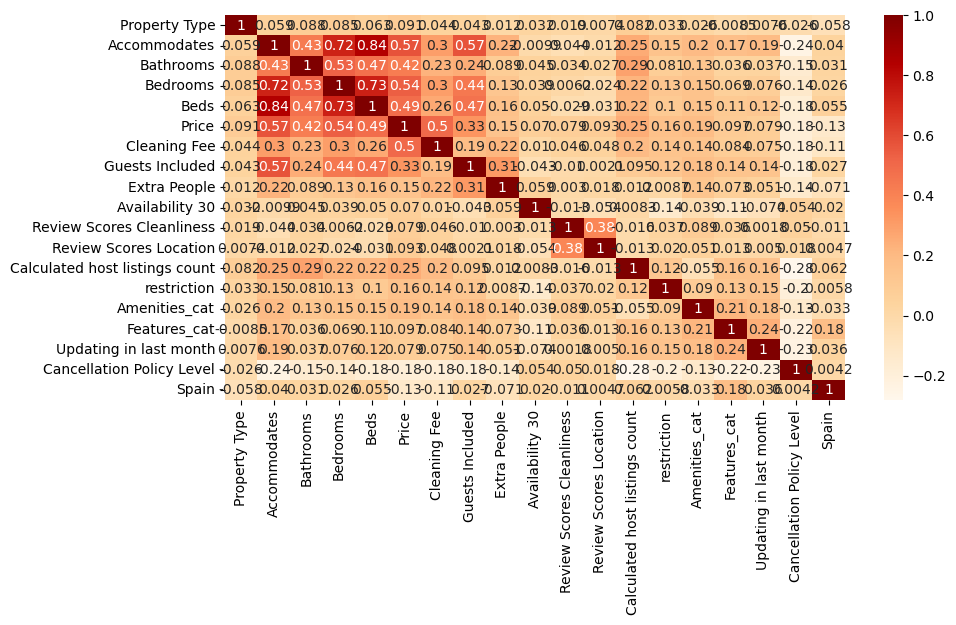

In [49]:
import seaborn as sns
plt.figure(figsize=(10,5))
correlaciones= df.corr()
sns.heatmap(correlaciones,cmap="OrRd",annot=True)
correlaciones

Observamos que bed posee una alta correlación con bedrooms y accomodates. Esto tiene sentido y parece que tenemos tres variable que en cierto modo aportan la misma información. Así que crearemos una nueva variable que las unifique.

In [50]:
# Crear la nueva variable que une las variables "bedrooms" y "beds"
df['total_sleeping_spaces'] = df['Bedrooms'] + df['Beds']+ df['Accommodates']

#eliminamos las ods variables
df=df.drop(['Bedrooms', 'Beds', 'Accommodates' ],axis=1)

In [51]:
df

,Property Type,Bathrooms,Price,Cleaning Fee,Guests Included,Extra People,Availability 30,Review Scores Cleanliness,Review Scores Location,Calculated host listings count,restriction,Amenities_cat,Features_cat,Updating in last month,Cancellation Policy Level,Spain,total_sleeping_spaces
0,17,1.0,58.0,25.0,1.0,0.0,10.0,10.0,10.0,1.0,1,23,4,1,5,0,4.0
1,14,1.0,70.0,40.0,2.0,44.0,6.0,10.0,8.0,106.0,0,7,3,1,1,1,6.0
2,14,1.0,70.0,60.0,2.0,42.0,7.0,10.0,10.0,106.0,0,7,3,1,1,1,6.0
3,14,2.0,229.0,79.0,2.0,39.0,11.0,9.0,10.0,24.0,1,24,4,1,3,1,15.0
4,14,1.0,149.0,55.0,1.0,0.0,0.0,10.0,10.0,92.0,1,12,5,1,7,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,14,1.0,90.0,60.0,1.0,0.0,7.0,10.0,9.0,1.0,0,11,4,1,3,0,5.0
14776,11,1.0,75.0,25.0,1.0,0.0,17.0,10.0,10.0,1.0,1,11,3,1,7,0,4.0
14777,14,1.0,100.0,40.0,3.0,10.0,7.0,10.0,10.0,1.0,1,17,3,1,3,0,10.0
14778,14,1.0,99.0,10.0,2.0,10.0,0.0,10.0,10.0,1.0,1,18,3,1,5,0,7.0


In [52]:
print('Cantidad de Filas y columnas:',df.shape)
l=df.columns
print('Nombre columnas:',l)
lista1=enumerate(l)


Cantidad de Filas y columnas: (14609, 17)
Nombre columnas: Index(['Property Type', 'Bathrooms', 'Price', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Availability 30',
       'Review Scores Cleanliness', 'Review Scores Location',
       'Calculated host listings count', 'restriction', 'Amenities_cat',
       'Features_cat', 'Updating in last month', 'Cancellation Policy Level',
       'Spain', 'total_sleeping_spaces'],
      dtype='object')


### 1.4. Detección, tratamiento de Outliersy análisis gráfico

In [53]:
df.describe()

,Property Type,Bathrooms,Price,Cleaning Fee,Guests Included,Extra People,Availability 30,Review Scores Cleanliness,Review Scores Location,Calculated host listings count,restriction,Amenities_cat,Features_cat,Updating in last month,Cancellation Policy Level,Spain,total_sleeping_spaces
count,14609.000000,14609.000000,14609.000000,14609.000000,14609.000000,14609.000000,14609.000000,14609.000000,14609.000000,14609.000000,14609.000000,14609.000000,14609.000000,14609.000000,14609.000000,14609.000000,14609.000000
mean,14.167089,1.282531,72.101239,29.039496,1.596413,7.750154,8.806968,9.477309,9.635978,9.577726,0.665822,14.434732,3.738107,0.764597,4.812171,0.947156,6.686084
std,2.351725,0.658227,67.669961,24.017949,1.187699,12.994997,9.189706,0.915469,0.709240,23.744879,0.471718,4.653698,1.049109,0.424265,1.694504,0.223730,4.288047
min,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
25%,14.000000,1.000000,34.000000,20.000000,1.000000,0.000000,0.000000,9.000000,9.000000,1.000000,0.000000,11.000000,3.000000,1.000000,3.000000,1.000000,4.000000
50%,14.000000,1.000000,55.000000,25.000000,1.000000,0.000000,6.000000,10.000000,10.000000,2.000000,1.000000,14.000000,4.000000,1.000000,5.000000,1.000000,5.000000
75%,14.000000,1.000000,85.000000,30.000000,2.000000,15.000000,14.000000,10.000000,10.000000,5.000000,1.000000,17.000000,4.000000,1.000000,7.000000,1.000000,8.000000
max,21.000000,8.000000,999.000000,662.000000,16.000000,500.000000,30.000000,10.000000,10.000000,145.000000,1.000000,42.000000,8.000000,1.000000,7.000000,1.000000,42.000000


Observamos que el precio medio es 72, si bien el minimo es 9 y el máximo alcanza 999. Con lo que podemos suponer la existencia de outliers.

Observamos como el numero medio de baños es 1, siendo el minimo 0 y el maximo 8. Nos lleva a pensar que tener 8 baños es un posibles outlier, porque ¿qué casa tiene 8 baños? Lo comprobamos.


Con el mismo argumento vemos que "total sleeping", "cleaning fee", "Extra People" y "guest included" spaces posee gran varianza entre el minimo y el máximo.

In [54]:
df["Bathrooms"].value_counts()


1.0    10996
2.0     2262
1.5      549
3.0      321
2.5      117
4.0       71
0.5       67
0.0       64
5.0       61
6.0       29
4.5       28
3.5       24
5.5        8
8.0        4
7.0        4
6.5        3
7.5        1
Name: Bathrooms, dtype: int64

Observamos que muchas tiene un número d ebaños que podría parecer ilógico por tener x,5 pero esto lo interpretaremos como la presencia de aseos. En esta variable consideraremos outliers aquellas casas con mas de seis baños. Es decir eliminamos 12 observaciones de la muestra.


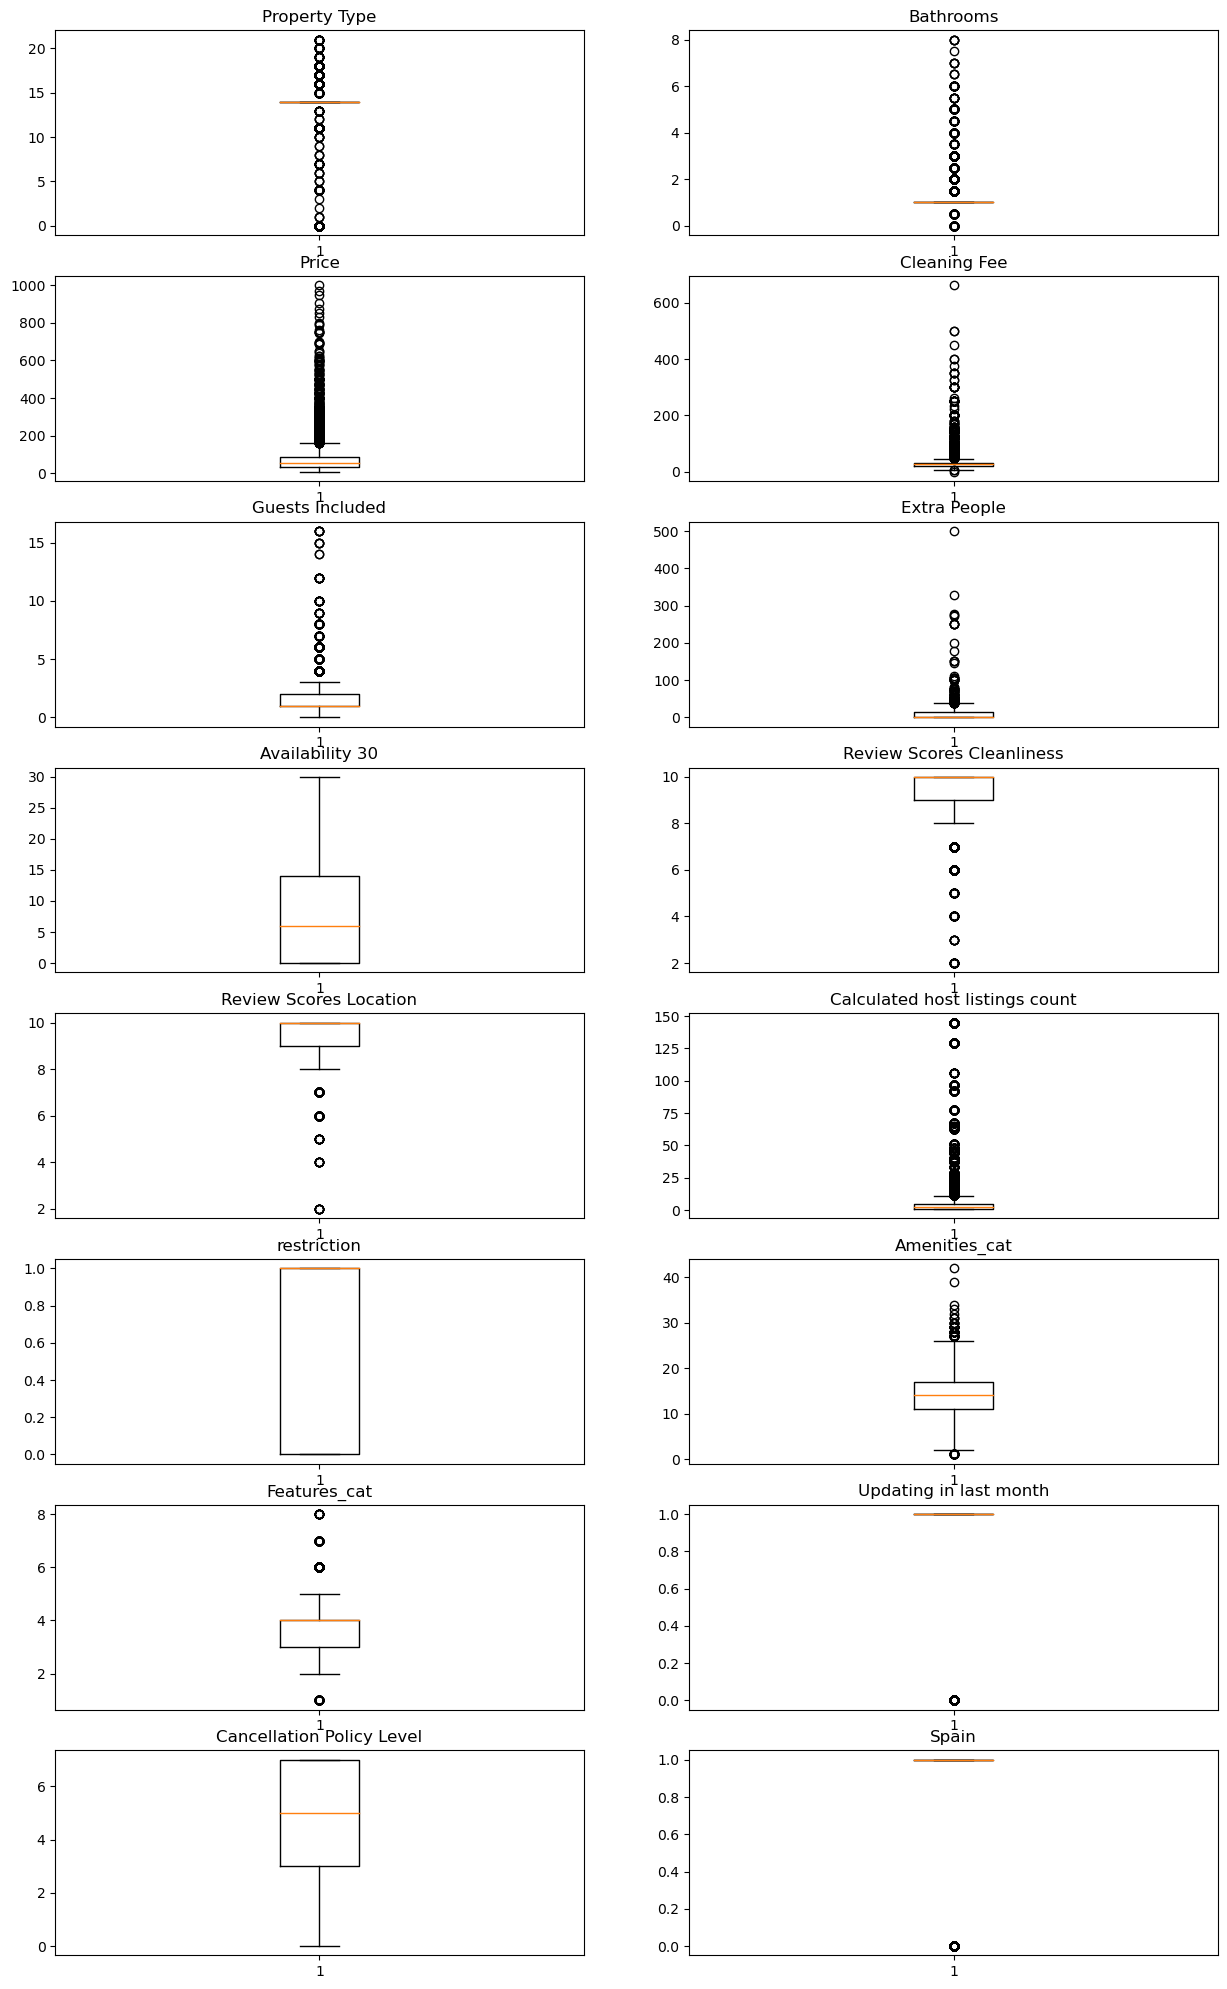

In [55]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(df.columns[:-1]) // 2 + len(df.columns[:-1]) % 2, 2, figsize=(15, 25))
axs = axs.flatten()

for i, var in enumerate(df.columns[:-1]):
    axs[i].boxplot(df[var])
    axs[i].set_title(var)

plt.show()


Observamos que todas las variables salvo 'Cancellation Policy Level', 'restriction' y 'Availability 30' presentan outliers, si bien alguna sde ellas tienen un número pequeño de estos ('Spain','Updating in last month','Features_cat').

A partir de aquí creamos una función que clasifique cada observacion como outlier cuando lo es para al menos 3 variables distintas, esto lo haremos mediante una matriz booleana que tome el valor True en la posición (i,j) si la observación i es un outlier para la variable j y False en caso contrario.

In [56]:
columnas =[ "Property Type","Bathrooms","Price", "Cleaning Fee", "Guests Included", "Extra People",
            "Availability 30", "Review Scores Cleanliness","Review Scores Location", "Calculated host listings count",  "Amenities_cat", "Features_cat", "total_sleeping_spaces" ] 

Q1 = df[columnas].quantile(0.25)
Q3 = df[columnas].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Property Type                      0.0
Bathrooms                          0.0
Price                             51.0
Cleaning Fee                      10.0
Guests Included                    1.0
Extra People                      15.0
Availability 30                   14.0
Review Scores Cleanliness          1.0
Review Scores Location             1.0
Calculated host listings count     4.0
Amenities_cat                      6.0
Features_cat                       1.0
total_sleeping_spaces              4.0
dtype: float64


In [57]:
outliers=(df[columnas] < (Q1 - 1.5 * IQR)) | (df[columnas] > (Q3 + 1.5 * IQR))
bool_sum = np.sum(outliers, axis=1) > 2
bool_sum

0        False
1        False
2         True
3         True
4        False
         ...  
14775    False
14776    False
14777    False
14778    False
14779    False
Length: 14609, dtype: bool

In [58]:
filas_con_outliers = df[bool_sum]
print("Observaciones consideradas outliers:")
print(filas_con_outliers)

Observaciones consideradas outliers:
       Property Type  Bathrooms  Price  Cleaning Fee  Guests Included  \
2                 14        1.0   70.0          60.0              2.0   
3                 14        2.0  229.0          79.0              2.0   
6                 14        2.0   52.0          60.0              4.0   
9                 18        2.0  795.0         250.0              1.0   
12                14        1.0   90.0          60.0              2.0   
...              ...        ...    ...           ...              ...   
14768             21        4.0  950.0         350.0              1.0   
14770             18        1.0   90.0          60.0              6.0   
14771             18        2.0  160.0          50.0              1.0   
14772             18        4.0  196.0          25.0              1.0   
14773             18        3.0  260.0          60.0              1.0   

       Extra People  Availability 30  Review Scores Cleanliness  \
2              42.0

Observamos que hay 1585 outliers que deben ser tratados

In [59]:
df_filtered = df.drop(df[bool_sum].index)
df_filtered

,Property Type,Bathrooms,Price,Cleaning Fee,Guests Included,Extra People,Availability 30,Review Scores Cleanliness,Review Scores Location,Calculated host listings count,restriction,Amenities_cat,Features_cat,Updating in last month,Cancellation Policy Level,Spain,total_sleeping_spaces
0,17,1.0,58.0,25.0,1.0,0.0,10.0,10.0,10.0,1.0,1,23,4,1,5,0,4.0
1,14,1.0,70.0,40.0,2.0,44.0,6.0,10.0,8.0,106.0,0,7,3,1,1,1,6.0
4,14,1.0,149.0,55.0,1.0,0.0,0.0,10.0,10.0,92.0,1,12,5,1,7,1,9.0
5,14,1.0,106.0,25.0,1.0,0.0,0.0,10.0,10.0,92.0,1,9,5,1,3,1,11.0
7,14,1.0,45.0,30.0,1.0,20.0,13.0,10.0,10.0,1.0,1,17,3,1,7,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,14,1.0,90.0,60.0,1.0,0.0,7.0,10.0,9.0,1.0,0,11,4,1,3,0,5.0
14776,11,1.0,75.0,25.0,1.0,0.0,17.0,10.0,10.0,1.0,1,11,3,1,7,0,4.0
14777,14,1.0,100.0,40.0,3.0,10.0,7.0,10.0,10.0,1.0,1,17,3,1,3,0,10.0
14778,14,1.0,99.0,10.0,2.0,10.0,0.0,10.0,10.0,1.0,1,18,3,1,5,0,7.0


In [60]:
len(df)-len(df_filtered)

1585

Tras tratar los outliers hemos eliminado 1585 observaciones, quedandonos con 13024.

In [61]:
df_filtered.columns

Index(['Property Type', 'Bathrooms', 'Price', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Availability 30',
       'Review Scores Cleanliness', 'Review Scores Location',
       'Calculated host listings count', 'restriction', 'Amenities_cat',
       'Features_cat', 'Updating in last month', 'Cancellation Policy Level',
       'Spain', 'total_sleeping_spaces'],
      dtype='object')

C:\anaconda\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


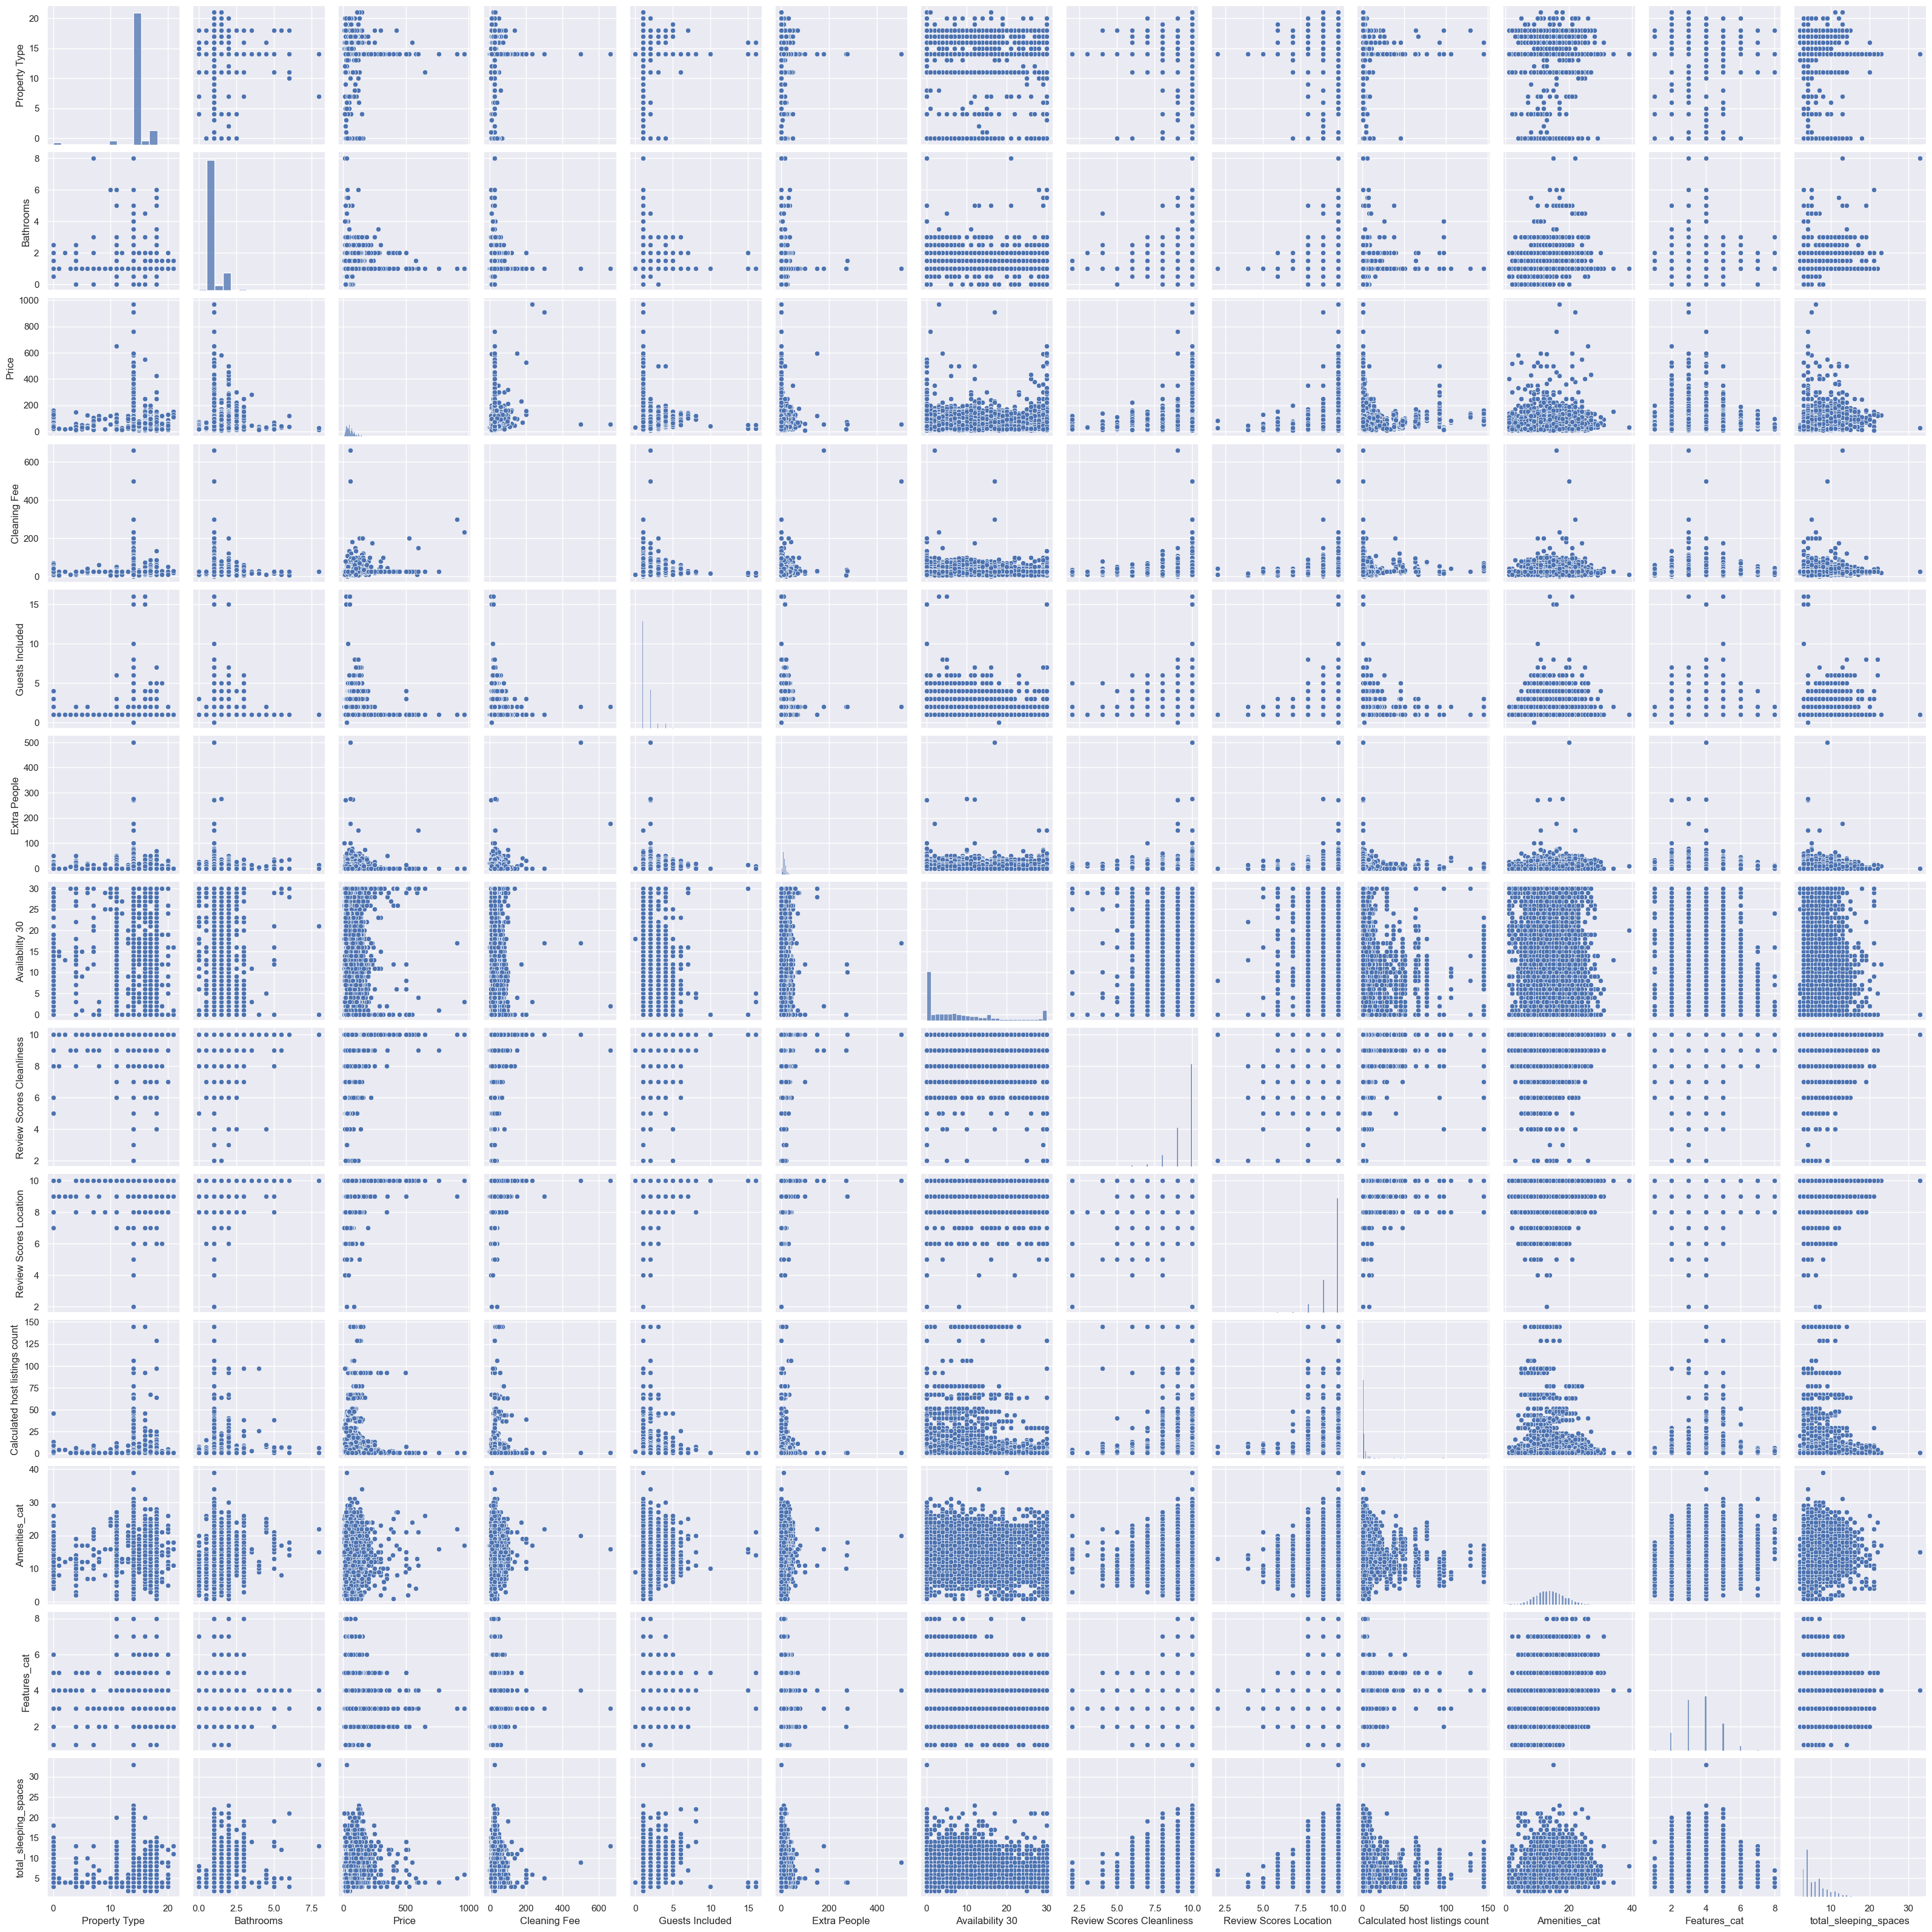

In [62]:
from pandas.plotting import scatter_matrix
attributes =[ "Property Type","Bathrooms","Price", "Cleaning Fee", "Guests Included", "Extra People",
            "Availability 30", "Review Scores Cleanliness","Review Scores Location", "Calculated host listings count",  "Amenities_cat", "Features_cat", "total_sleeping_spaces" ] 

sns.set()

sns.pairplot(df_filtered[attributes], size = 2.5)
plt.show();

Observamos que analizando los gráficos que relacionan price con otras variables sigue habiendo outliers en "Property Type","Bathrooms" y "Cleaning Fee".
Para tratar los outliers y hacer que mi predicción no se vea pejudicada usaremos una función que utiliza la distancia de Mahalanobis y vea los outliers en varios regresores al mismo tiempo. Estos regresores elegidos han sido: 'Price', "Guests Included", "Extra People" y Calculated host listings count".

In [63]:
df_filtered.columns

Index(['Property Type', 'Bathrooms', 'Price', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Availability 30',
       'Review Scores Cleanliness', 'Review Scores Location',
       'Calculated host listings count', 'restriction', 'Amenities_cat',
       'Features_cat', 'Updating in last month', 'Cancellation Policy Level',
       'Spain', 'total_sleeping_spaces'],
      dtype='object')

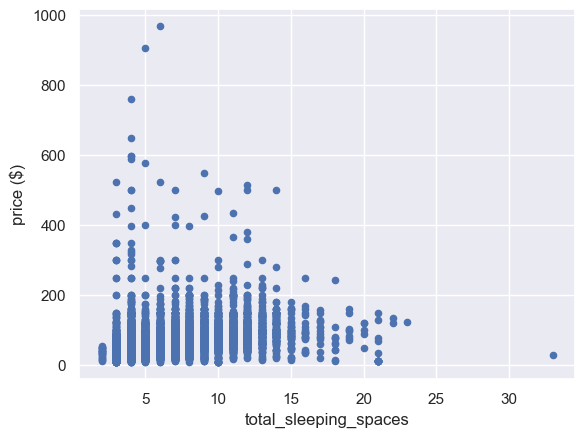

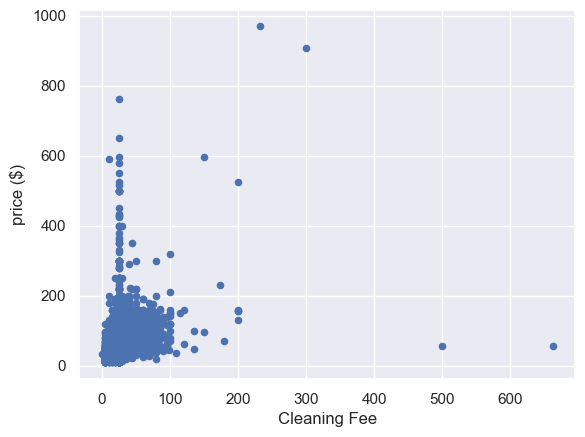

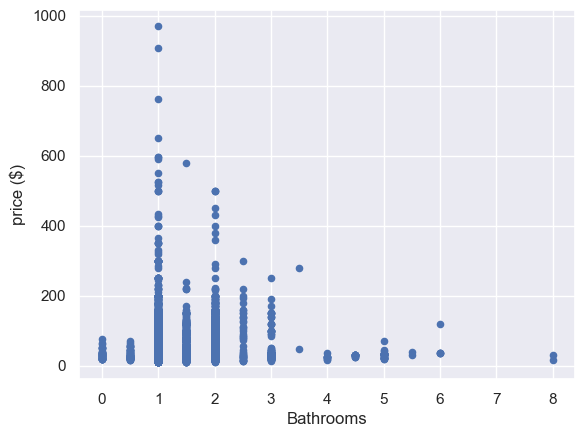

In [64]:
df_filtered.plot(kind = 'scatter',x='total_sleeping_spaces' ,y = 'Price')
plt.xlabel('total_sleeping_spaces')
plt.ylabel('price ($)')
plt.show()

df_filtered.plot(kind = 'scatter',x='Cleaning Fee',y = 'Price')
plt.xlabel('Cleaning Fee')
plt.ylabel('price ($)')
plt.show()

df_filtered.plot(kind = 'scatter',x="Bathrooms",y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('price ($)')
plt.show()

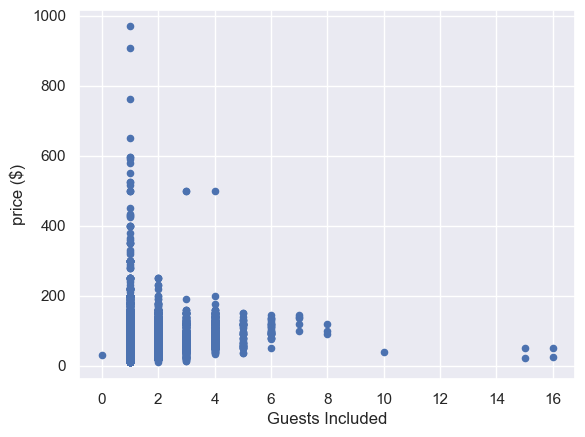

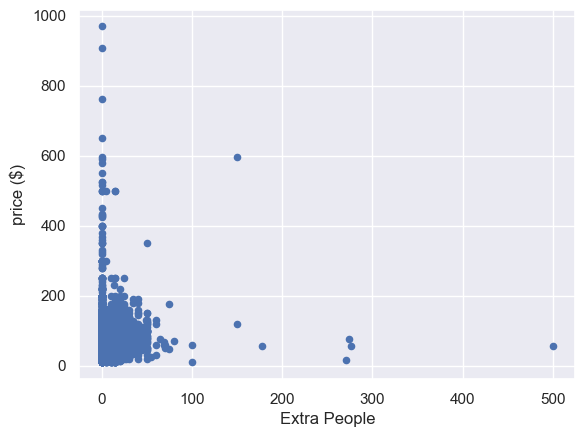

In [65]:
df_filtered.plot(kind = 'scatter',x='Guests Included' ,y = 'Price')
plt.xlabel('Guests Included')
plt.ylabel('price ($)')
plt.show()

df_filtered.plot(kind = 'scatter',x="Extra People",y = 'Price')
plt.xlabel('Extra People')
plt.ylabel('price ($)')
plt.show()

In [66]:
df_filtered1= df_filtered.drop(df_filtered[df_filtered["Bathrooms"]>6].index)
df_filtered2= df_filtered1.drop(df_filtered1[df_filtered1["Cleaning Fee"]>400].index)
df_filtered3= df_filtered2.drop(df_filtered2[df_filtered2["total_sleeping_spaces"]>25].index)
df_filtered4= df_filtered3.drop(df_filtered3[df_filtered3["Guests Included"]>12].index)
df_filtered5= df_filtered4.drop(df_filtered4[df_filtered4["Extra People"]>300].index)

In [67]:
len(df_filtered)-len(df_filtered5)

8

Hemos eliminado 8 outiers más.

In [68]:
df=df_filtered5

## 2. Calculo del precio dadas las características.

Nuestro problema inicial es tratar de determinar el precio de un apartamento dadas las característica de este. Como ya sabemos existen varios métodos para realizar este procedimiento. En nuestro caso particular trataremos de hacerlo mediante dos métodos distintos, en primer lugar con una regresión lineal y en segundo lugar con una red neuronal. 

### 2.1. División del conjunto de datos.

Como es habitual en los problemas de predicción, en este primer paso dividimos los datos en tres subconjuntos entrenamiento, validación y test. Para ello usamos la función train_val_test_split.

In [69]:
#Separamos en entrenamiento, validacion y test
from sklearn.model_selection import train_test_split
# Divido los datos en conjuntos de entrenamiento (70%), validación (15%) y prueba (15%)
train_val, test = train_test_split(df, test_size=0.15, shuffle=True)

# Divido los datos de entrenamiento y validación (el 15% del total) en conjuntos de entrenamiento (82.4%) y validación (17.6%)
train, val = train_test_split(train_val, test_size=0.176, shuffle=True)

In [70]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.3, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [71]:
train_set, val_set, test_set = train_val_test_split(df)

A continuación separamos las etiquetas de las características de entrada para cada uno de los subconjuntos.

In [72]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)
#datos de entrenamiento
X_train, y_train = remove_labels(train, 'Price')
#datos de validación
X_val, y_val = remove_labels(val, 'Price')
#datos de test
X_test, y_test = remove_labels(test, 'Price')


In [73]:
# Conjunto de datos general
X_df = df.drop("Price", axis=1)
y_df = df["Price"].copy()

In [74]:
print('Datos entrenamiento: ', X_train.shape)
print('Datos validacion: ', X_val.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (9115, 16)
Datos validacion:  (1948, 16)
Datos test:  (1953, 16)


### 2.2. Regresión Lineal.

Para mejorar la predicción de nuestro modelo transformamos la variable dependiente 'Price' en logaritmo.

In [75]:
y_df=np.log(y_df)
y_train=np.log(y_train)
y_val=np.log(y_val)
y_test=np.log(y_test)

Ahora procedemos a estimar nuestro modelo de regresión lineal:

In [76]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Calculamos las predicciones de mi modelo 

In [77]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)
y_pred_val=reg.predict(X_val)

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#RMSE
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
val_rmse = mean_squared_error(y_val, y_pred_val, squared=False)

#MAE
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
val_mae = mean_absolute_error(y_val, y_pred_val)

#R2
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
val_r2 =r2_score(y_val, y_pred_val)

In [79]:
print("Vemos como de bueno es el entrenamiento:")
print("El Rmse del entrenamiento del modelo es:", train_rmse)
print("El mae del entrenamiento del modelo es:", train_mae)
print("El R2 del entrenamiento del modelo es:", train_r2)

Vemos como de bueno es el entrenamiento:
El Rmse del entrenamiento del modelo es: 0.45887282347605407
El mae del entrenamiento del modelo es: 0.34999903753370687
El R2 del entrenamiento del modelo es: 0.418101091154803


In [80]:
print("RMSE:")
print("El Rmse del test del modelo es:",test_rmse)
print("El Rmse de la validación del modelo es:",val_rmse)
print("MAE:")
print("El mae del test del modelo es:",test_mae)
print("El mae de la validación del modelo es:",val_mae)
print("R2:")
print("El R2 del test del modelo es:",test_r2)
print("El R2 de la validación del modelo es:",val_r2)

RMSE:
El Rmse del test del modelo es: 0.45936693201471734
El Rmse de la validación del modelo es: 0.47809789533990377
MAE:
El mae del test del modelo es: 0.34577773334033773
El mae de la validación del modelo es: 0.3654646994635193
R2:
El R2 del test del modelo es: 0.45465682125536777
El R2 de la validación del modelo es: 0.4215630925816247


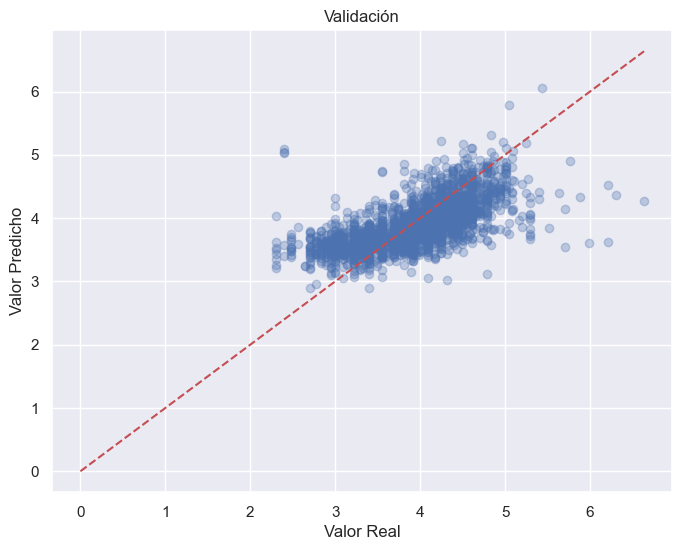

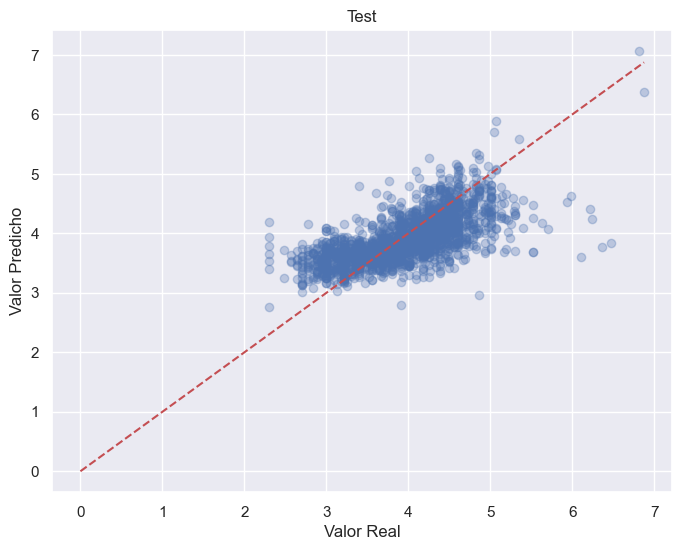

In [81]:
# crear un gráfico con los valores reales y predichos para el conjunto de validación
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_val, alpha=0.3)
plt.plot([0, max(y_val)], [0, max(y_val)], 'r--')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Validación')
plt.show()

# crear un gráfico con los valores reales y predichos para el conjunto de test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Test')
plt.show()

### 2.3. Red Neuronal.

In [82]:
pip install keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [84]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [85]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [86]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae', 'mse'])

In [87]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
285/285 [==============================] - 1s 3ms/step - loss: 0.8317 - mae: 0.6086 - mse: 0.8317 - val_loss: 0.3318 - val_mae: 0.4483 - val_mse: 0.3318
Epoch 2/100
285/285 [==============================] - 1s 2ms/step - loss: 0.2994 - mae: 0.4073 - mse: 0.2994 - val_loss: 0.2694 - val_mae: 0.3948 - val_mse: 0.2694
Epoch 3/100
285/285 [==============================] - 1s 2ms/step - loss: 0.2399 - mae: 0.3744 - mse: 0.2399 - val_loss: 0.2506 - val_mae: 0.3762 - val_mse: 0.2506
Epoch 4/100
285/285 [==============================] - 1s 2ms/step - loss: 0.2603 - mae: 0.3691 - mse: 0.2603 - val_loss: 0.2731 - val_mae: 0.3681 - val_mse: 0.2731
Epoch 5/100
285/285 [==============================] - 1s 2ms/step - loss: 0.2307 - mae: 0.3572 - mse: 0.2307 - val_loss: 0.2244 - val_mae: 0.3611 - val_mse: 0.2244
Epoch 6/100
285/285 [==============================] - 0s 2ms/step - loss: 0.2129 - mae: 0.3508 - mse: 0.2129 - val_loss: 0.2602 - val_mae: 0.3738 - val_mse: 0.2602
Epoch 7/10

285/285 [==============================] - 0s 2ms/step - loss: 0.1491 - mae: 0.2915 - mse: 0.1491 - val_loss: 0.1695 - val_mae: 0.3103 - val_mse: 0.1695
Epoch 100/100
285/285 [==============================] - 0s 2ms/step - loss: 0.1481 - mae: 0.2923 - mse: 0.1481 - val_loss: 0.1741 - val_mae: 0.3155 - val_mse: 0.1741


In [88]:
train_loss, train_mae, train_mse = model.evaluate(X_train, y_train)
val_loss, val_mae, val_mse = model.evaluate(X_val, y_val)
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test)

62/62 [==============================] - 0s 1ms/step - loss: 0.1692 - mae: 0.3050 - mse: 0.1692


In [89]:
print('Train MAE:', train_mae)
print('Train MSE:', train_mse)
print('Validation MAE:', val_mae)
print('Validation MSE:', val_mse)
print('Test MAE:', test_mae)
print('Test MSE:', test_mse)

Train MAE: 0.290731281042099
Train MSE: 0.14594902098178864
Validation MAE: 0.31545689702033997
Validation MSE: 0.17406277358531952
Test MAE: 0.3050462603569031
Test MSE: 0.16918429732322693


## 3. Clasificador dado el precio y las características.

Tras concluir con el apartado 2 vamos a tratar de realizar un problema de clasificación mediante otra red neuronal y mediante regersión logística. Para ello crearemos unos umbrales para los cuales nuestra red clasificará las ofertas de apartamento en tres grupos:
 - Super Precio
 - Timo
 - Precio Justo

Dado que hay mucha variabilidad dentro de nuestras observaciones trataremos de dividirlas en grupos según su precio, posteriormente a partir de los estadísticos descriptivos clasificaremos en los tres tipos de ofertas nombrados anteriormente.

In [90]:
df["Price"].describe()

count    13016.000000
mean        59.855793
std         42.841181
min          9.000000
25%         30.000000
50%         50.000000
75%         77.000000
max        969.000000
Name: Price, dtype: float64

#### En primer lugar dividimos nuestras observaciones en 10 grupos de tamaño similar.

In [91]:
df['Grupo'] = pd.qcut(df['Price'], q=10, labels=False)
df

,Property Type,Bathrooms,Price,Cleaning Fee,Guests Included,Extra People,Availability 30,Review Scores Cleanliness,Review Scores Location,Calculated host listings count,restriction,Amenities_cat,Features_cat,Updating in last month,Cancellation Policy Level,Spain,total_sleeping_spaces,Grupo
0,17,1.0,58.0,25.0,1.0,0.0,10.0,10.0,10.0,1.0,1,23,4,1,5,0,4.0,5
1,14,1.0,70.0,40.0,2.0,44.0,6.0,10.0,8.0,106.0,0,7,3,1,1,1,6.0,6
4,14,1.0,149.0,55.0,1.0,0.0,0.0,10.0,10.0,92.0,1,12,5,1,7,1,9.0,9
5,14,1.0,106.0,25.0,1.0,0.0,0.0,10.0,10.0,92.0,1,9,5,1,3,1,11.0,9
7,14,1.0,45.0,30.0,1.0,20.0,13.0,10.0,10.0,1.0,1,17,3,1,7,1,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,14,1.0,90.0,60.0,1.0,0.0,7.0,10.0,9.0,1.0,0,11,4,1,3,0,5.0,8
14776,11,1.0,75.0,25.0,1.0,0.0,17.0,10.0,10.0,1.0,1,11,3,1,7,0,4.0,7
14777,14,1.0,100.0,40.0,3.0,10.0,7.0,10.0,10.0,1.0,1,17,3,1,3,0,10.0,8
14778,14,1.0,99.0,10.0,2.0,10.0,0.0,10.0,10.0,1.0,1,18,3,1,5,0,7.0,8


In [92]:
df["Grupo"].value_counts()

3    1517
2    1437
5    1430
0    1335
8    1321
1    1273
9    1263
6    1239
7    1177
4    1024
Name: Grupo, dtype: int64

#### En segundo lugar, seleccionamos las variables más correladas con 'Price', estás serán las que tengamos en cuenta a la hora de clasificar las variables en Super Precio, Precio Justo y Timo.

In [93]:
df.columns

Index(['Property Type', 'Bathrooms', 'Price', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Availability 30',
       'Review Scores Cleanliness', 'Review Scores Location',
       'Calculated host listings count', 'restriction', 'Amenities_cat',
       'Features_cat', 'Updating in last month', 'Cancellation Policy Level',
       'Spain', 'total_sleeping_spaces', 'Grupo'],
      dtype='object')

In [94]:
corr_matrix = df.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                             1.000000
Grupo                             0.791854
total_sleeping_spaces             0.426176
Cleaning Fee                      0.386131
Guests Included                   0.234638
restriction                       0.165605
Amenities_cat                     0.155718
Review Scores Location            0.130519
Calculated host listings count    0.112725
Features_cat                      0.083292
Review Scores Cleanliness         0.073388
Extra People                      0.070652
Updating in last month            0.059142
Bathrooms                         0.047143
Property Type                     0.007064
Availability 30                  -0.007497
Cancellation Policy Level        -0.096272
Spain                            -0.158407
Name: Price, dtype: float64

In [95]:
grupos = range(10)
variables = ['Price', 'total_sleeping_spaces', 'Cleaning Fee', 'Guests Included', 'restriction']

#### En tercer lugar, realizamos un bucle para clasificar las observaciones.

In [96]:
for grupo in grupos:
    grupo_df = df[df['Grupo'] == grupo]
    
    descriptivos = grupo_df[variables].describe()
    
    # Calcular los límites para la clasificación
    x = 2  
    price_mean = descriptivos.loc['mean', 'Price']
    price_lower_limit = price_mean - x
    price_upper_limit = price_mean + x
    
    for index, observacion in grupo_df.iterrows():
        valoracion = ''
        if observacion['Price'] >= price_upper_limit and all(observacion[variable] <= descriptivos.loc['mean', variable] for variable in variables[1:]):
            valoracion = 'timo'
        elif observacion['Price'] <= price_lower_limit and all(observacion[variable] >= descriptivos.loc['mean', variable] for variable in variables[1:]):
            valoracion = 'Superprecio'
        else:
            valoracion = 'Precio Justo'
        
        df.loc[index, 'valoracion'] = valoracion

In [97]:
df["valoracion"].value_counts()

Precio Justo    12300
Superprecio       395
timo              321
Name: valoracion, dtype: int64

Observamos que nuestra variable valoración está desbalanceada dado que la mayoría de las observaciones pertenecen a la clase precio justo. Para evitar este problema vamos a utilizar el metodo 'Undersampling' que elimina aleatoriamente datos de la clase mayoritaria, esto generará una reducción drástica del número de observaciones pero nos permite elaborar el problema de clasificación de manera adecuada.

In [98]:
df=df.drop(['Grupo'],axis=1)

In [99]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [100]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
X_resampled, y_resampled=rus.fit_resample(df[df.columns[:-1]], df[['valoracion']])
df_resampled = pd.DataFrame(X_resampled, columns=df.drop('valoracion', axis=1).columns)
df_resampled['valoracion'] = y_resampled
print('Filas que nos quedamos:', len(rus.sample_indices_))

Filas que nos quedamos: 963


A continuación transformamos nuestra variable dependiente en una numérica usando Label Encoder.

In [101]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_resampled['valoracion'] = encoder.fit_transform(df_resampled['valoracion'])

### 3.1. División de los datos entre validación, entrenamiento y test.

Dividimos nuestro conjunto de datos en validación, entrenamiento y test de igual manera que hicimos en el problema de regresión.

In [102]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.3, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [103]:
train_set, val_set, test_set = train_val_test_split(df_resampled)

In [104]:
X = df_resampled.drop("valoracion", axis=1)
y = df_resampled["valoracion"]

In [105]:
# Conjunto de datos de entrenamiento
X_train = train_set.drop("valoracion", axis=1)
y_train = train_set["valoracion"].copy()

In [106]:
# Conjunto de datos de validación
X_val = val_set.drop("valoracion", axis=1)
y_val = val_set["valoracion"].copy()

In [107]:
# Conjunto de datos de pruebas
X_test = test_set.drop("valoracion", axis=1)
y_test = test_set["valoracion"].copy()

In [108]:
print('Datos entrenamiento: ', X_train.shape)
print('Datos validacion: ', X_val.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (674, 17)
Datos validacion:  (144, 17)
Datos test:  (145, 17)


### 3.2. Regresión Logística

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
# Entrenamos un algoritmo basado en regresión logística
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression(max_iter=5000)
clf.fit(X_train, y_train)
#class_weight lo que hace es dar mas peso a algunos elementos de la muestra, fit_intercept=True : nos dice si queremos que haya un intercepto o no
#penalty='l2' me pone una penalizacion y el solver: se esta planetando como un porceso de optimizacion

LogisticRegression(max_iter=5000)

In [111]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_val=clf.predict(X_val)

In [112]:
from sklearn.metrics import confusion_matrix

p=confusion_matrix(y_val, y_pred_val)

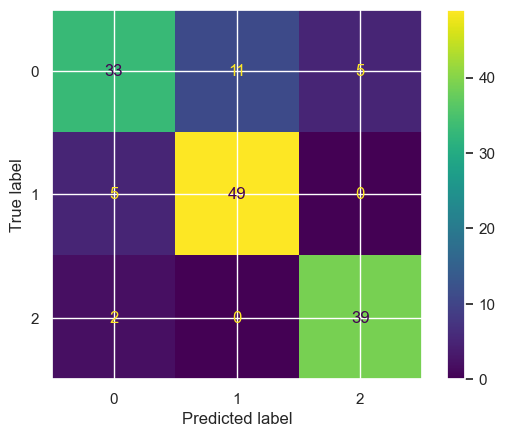

In [113]:
from sklearn import metrics
from sklearn.metrics import  ConfusionMatrixDisplay
cm= metrics.ConfusionMatrixDisplay(p)

cm.plot()
plt.show()
#plot_confusion_matrix(clf, X_val, y_val, values_format='3g')

In [114]:
from sklearn.metrics import precision_score

# Calcular la precisión macro
precision_macro = precision_score(y_val, y_pred_val, average='macro')
print("Precisión macro:", precision_macro)

# Calcular la precisión ponderada
precision_weighted = precision_score(y_val, y_pred_val, average='weighted')
print("Precisión ponderada:", precision_weighted)



Precisión macro: 0.8426767676767676
Precisión ponderada: 0.8393465909090909


In [115]:
from sklearn.metrics import recall_score
# Calcular la exhaustividad (recall) micro
recall_micro = recall_score(y_pred_test, y_test, average='weighted')
print("Exhaustividad (recall) micro:", recall_micro)

# Calcular la exhaustividad (recall) macro
recall_macro = recall_score(y_pred_test, y_test, average='macro')
print("Exhaustividad (recall) macro:", recall_macro)


Exhaustividad (recall) micro: 0.8896551724137931
Exhaustividad (recall) macro: 0.8910985561833019


In [116]:
from sklearn.metrics import f1_score
# Calcular la puntuación F1 micro
f1_micro = f1_score(y_pred_test, y_test, average='weighted')
print("Puntuación F1 weighted:", f1_micro)

# Calcular la puntuación F1 macro
f1_macro = f1_score(y_pred_test, y_test, average='macro')
print("Puntuación F1 macro:", f1_macro)

Puntuación F1 weighted: 0.8929028852920479
Puntuación F1 macro: 0.8831632653061224


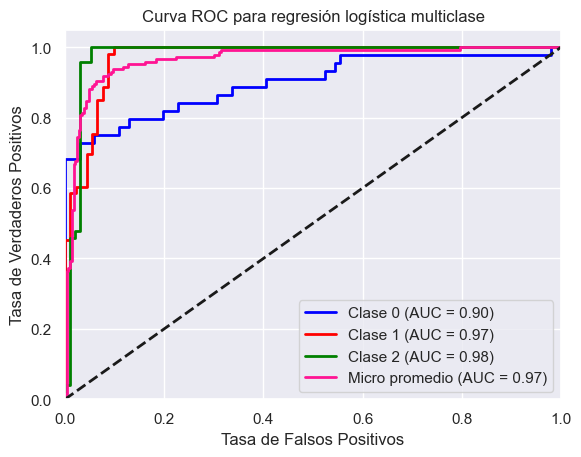

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt



# Obtén las predicciones de probabilidad para cada clase en tu conjunto de datos de prueba
y_pred_prob = clf.predict_proba(X_test)

# Convierte las etiquetas verdaderas en formato one-hot
y_test_onehot = label_binarize(y_test, classes=np.unique(y_test))

# Calcula la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_onehot.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcula el micro promedio de los puntajes de falso positivo y verdadero positivo
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Traza las curvas ROC para cada clase
plt.figure()
colors = ['blue', 'red', 'green']  # Colores para cada clase
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Clase {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# Traza la curva ROC micro promedio
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=2,
         label='Micro promedio (AUC = {0:0.2f})'
         ''.format(roc_auc["micro"]))

# Configura las propiedades del gráfico
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para regresión logística multiclase')
plt.legend(loc="lower right")

plt.show()



In [123]:
# Calcula el área bajo la curva ROC micro
roc_auc_micro = roc_auc_score(y_test_onehot, y_pred_prob, average='micro')

# Calcula el área bajo la curva ROC macro
roc_auc_macro = roc_auc_score(y_test_onehot, y_pred_prob, average='macro')

print("ROC AUC (micro):", roc_auc_micro)
print("ROC AUC (macro):", roc_auc_macro)


ROC AUC (micro): 0.9656837098692034
ROC AUC (macro): 0.9498002261576936


In [138]:
from sklearn.metrics import recall_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt



# Calcula el recall para cada clase
recall = dict()
n_classes = y_test_onehot.shape[1]
y_pred = np.argmax(y_pred_prob, axis=1)

for i in range(n_classes):
    recall[i] = recall_score(y_test_onehot[:, i], y_pred[:, i])

# Traza la curva de recall
plt.figure()
classes = range(n_classes)
colors = ['blue', 'red', 'green']  # Colores para cada clase

for i, color in zip(classes, colors):
    plt.plot([0, 1], [0, recall[i]], color=color, lw=2,
             label='Clase {0} (Recall = {1:0.2f})'
             ''.format(i, recall[i]))

# Configura las propiedades del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Umbral')
plt.ylabel('Recall')
plt.title('Curva de Recall para clasificación multiclase')
plt.legend(loc="lower right")

plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [156]:
from sklearn.metrics import plot_precision_recall_curve


plot_precision_recall_curve(clf, X_val_prep, y_val)

ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (C:\anaconda\lib\site-packages\sklearn\metrics\__init__.py)

### 3.3. Red Neuronal 

In [160]:
conda install tensorflow


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\anaconda

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           3 KB
    abseil-cpp-20211102.0      |       hd77b12b_0         1.7 MB
    absl-py-1.3.0              |  py310haa95532_0         172 KB
    aiohttp-3.8.3              |  py310h2bbff1b_0         418 KB
    aiosignal-1.2.0            |     pyhd3eb1b0_0          12 KB
    astunparse-1.6.3           |             py_0          17 KB
    async-timeout-4.0.2        |  py310haa95532_0          12 KB
    blinker-1.4                |  py31



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\anaconda




In [139]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [146]:
from tensorflow import keras
from tensorflow.keras import layers

# Obtén el número de características de tus datos
n_features = X_train.shape[1]  

y_train_onehot = label_binarize(y_train, classes=np.unique(y_train))
# Definir el modelo de la red neuronal
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(n_features,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train_onehot, epochs=10, batch_size=32)


# Hacer predicciones con el modelo
y_pred = model.predict(X_test)


Epoch 1/10
22/22 [==============================] - 1s 2ms/step - loss: 2.9738 - accuracy: 0.4243
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.9519 - accuracy: 0.6261
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7533 - accuracy: 0.6869
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.6988
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.7300
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7448
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 0.5828 - accuracy: 0.7478
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7760
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7938
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


In [145]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test_onehot)

print("Loss en el conjunto de prueba:", loss)
print("Accuracy en el conjunto de prueba:", accuracy)


5/5 [==============================] - 0s 2ms/step - loss: 0.7124 - accuracy: 0.7862
Loss en el conjunto de prueba: 0.7124029994010925
Accuracy en el conjunto de prueba: 0.7862069010734558


## 4. Conclusión.